In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
IXIC = pd.read_csv("Index IXIC Parsial 3.csv")

In [3]:
print(IXIC)

            Date         Open         High          Low        Close  \
0     1971-02-05   100.000000   100.000000   100.000000   100.000000   
1     1971-02-08   100.839996   100.839996   100.839996   100.839996   
2     1971-02-09   100.760002   100.760002   100.760002   100.760002   
3     1971-02-10   100.690002   100.690002   100.690002   100.690002   
4     1971-02-11   101.449997   101.449997   101.449997   101.449997   
...          ...          ...          ...          ...          ...   
9289  2007-11-26  2599.820068  2613.689941  2539.810059  2540.989990   
9290  2007-11-27  2557.979980  2585.929932  2546.370117  2580.800049   
9291  2007-11-28  2607.330078  2667.929932  2606.860107  2662.909912   
9292  2007-11-29  2653.360107  2675.209961  2648.489990  2668.129883   
9293  2007-11-30  2693.610107  2696.239990  2642.250000  2660.959961   

        Adj Close      Volume  
0      100.000000           0  
1      100.839996           0  
2      100.760002           0  
3      

In [4]:
#Metode Geometric Brownian Motion pada Index IXIC pada beberapa Timeline

In [5]:
#Geometric Brownian Motion dapat digunakan untuk memprediksi ada atau tidaknya
#penurunan harga yang diakibatkan oleh krisis yang terjadi

In [6]:
# Parameter Definitions

# So    :   initial stock price
# dt    :   time increment -> a day in our case
# T     :   length of the prediction time horizon(how many time points to predict, same unit with dt(days))
# N     :   number of time points in prediction the time horizon -> T/dt
# t     :   array for time points in the prediction time horizon [1, 2, 3, .. , N]
# mu    :   mean of historical daily returns
# sigma :   standard deviation of historical daily returns
# b     :   array for brownian increments
# W     :   array for brownian path

In [7]:
#Set Prediction Date
start_date = '1971-02-05'
end_date = '2007-12-01'
pred_end_date = '2009-06-30'

#Set Return Value
returns = (IXIC.loc[1:, 'Adj Close'] - \
           IXIC.shift(1).loc[1:, 'Adj Close']) / \
           IXIC.shift(1).loc[1:, 'Adj Close']
print(returns.tolist())

[0.008399959999999993, -0.0007932765090549907, -0.0006947201132448685, 0.007547869549153344, 0.005914302787017408, 0.0013718666916648996, -0.004403601048955914, -0.003145272324459918, -0.007099201480954441, -0.010129066836019761, 0.00040129414125190125, 0.00922581218185113, 0.0058625199310663074, 0.0010865652152554307, 0.004341849391823583, 0.0005894773097806341, 0.0022584839850150217, 0.006956000783775943, 0.002140504009928978, 0.011941776699029091, 0.001726959558851824, -0.0025860069883724707, 0.0011523238059566044, 0.002301918237062761, 0.006028679425837349, 0.004090183698949312, -0.0005683781843193395, 0.0036018672985782276, -0.0010389120052581738, -0.0037817340582888227, -0.0024675144025572446, -0.0039007135010873106, -0.0009551003138996923, 0.004493327045761452, 0.0012372418387741795, 0.002281416414869391, 0.005026545807538864, 0.00349150699734355, 0.004890022753057068, 0.002900963850823805, 0.0036390781681268727, 0.004648568327418526, 0.0029613085871055627, 0.0045211848455761995

In [8]:
#Parameter Assignments
#So
So = IXIC.loc[IXIC.shape[0] - 1, "Adj Close"]
print(So)

2660.959961


In [9]:
dt = 1 #day #user input
n_of_wkdays = pd.date_range(start = pd.to_datetime(end_date,
              format = "%Y-%m-%d") + pd.Timedelta('1 days'),
              end = pd.to_datetime(pred_end_date,
              format = "%Y-%m-%d")).to_series().map(lambda x:
              1 if x.isoweekday() in range(1,6) else 0).sum()
T = n_of_wkdays #days #user input -> follows from pred_end_date
N = T / dt
t = np.arange(1, int(N) + 1)
mu = np.mean(returns)
sigma = np.std(returns)
scen_size = 50 #user input
b = {str(scen): np.random.normal(0, 1, int(N)) for scen in range(1, scen_size + 1)}
W = {str(scen): b[str(scen)].cumsum() for scen in range (1, scen_size + 1)}

In [10]:
#Calcualting drift and diffusion components 
drift = (mu - 0.5 * sigma ** 2) * t
print(drift)

[0.00035323 0.00070647 0.0010597  0.00141294 0.00176617 0.00211941
 0.00247264 0.00282588 0.00317911 0.00353235 0.00388558 0.00423882
 0.00459205 0.00494529 0.00529852 0.00565176 0.00600499 0.00635823
 0.00671146 0.0070647  0.00741793 0.00777117 0.0081244  0.00847764
 0.00883087 0.00918411 0.00953734 0.00989058 0.01024381 0.01059704
 0.01095028 0.01130351 0.01165675 0.01200998 0.01236322 0.01271645
 0.01306969 0.01342292 0.01377616 0.01412939 0.01448263 0.01483586
 0.0151891  0.01554233 0.01589557 0.0162488  0.01660204 0.01695527
 0.01730851 0.01766174 0.01801498 0.01836821 0.01872145 0.01907468
 0.01942792 0.01978115 0.02013439 0.02048762 0.02084085 0.02119409
 0.02154732 0.02190056 0.02225379 0.02260703 0.02296026 0.0233135
 0.02366673 0.02401997 0.0243732  0.02472644 0.02507967 0.02543291
 0.02578614 0.02613938 0.02649261 0.02684585 0.02719908 0.02755232
 0.02790555 0.02825879 0.02861202 0.02896526 0.02931849 0.02967173
 0.03002496 0.0303782  0.03073143 0.03108466 0.0314379  0.03179

In [11]:
diffusion = {str(scen): sigma * W[str(scen)] for scen in range(1, scen_size + 1)}
print(diffusion)

{'1': array([-4.80753653e-03, -1.29636249e-02, -3.30982102e-02, -2.57673494e-02,
       -2.34509282e-02, -3.50332973e-02, -3.40208237e-02, -2.17878894e-02,
       -2.83525590e-02, -4.02782828e-02, -5.01312008e-02, -5.08316227e-02,
       -4.51510218e-02, -2.83152253e-02, -2.83435163e-02, -2.69224657e-02,
       -2.32741001e-02, -3.73855474e-02, -3.63937332e-02, -2.97402486e-02,
       -3.62894123e-02, -3.13396160e-02, -4.12246396e-02, -4.23953457e-02,
       -4.83631873e-02, -4.58131918e-02, -6.73293667e-02, -7.60279641e-02,
       -7.83452811e-02, -6.44041940e-02, -5.68563508e-02, -5.23285005e-02,
       -3.96449740e-02, -5.24067638e-02, -5.11228757e-02, -5.36073445e-02,
       -6.26097969e-02, -6.28476735e-02, -6.63343653e-02, -6.53443808e-02,
       -8.90985770e-02, -7.69317047e-02, -6.35356098e-02, -4.32618318e-02,
       -5.13281031e-02, -4.92151944e-02, -3.24226647e-02, -1.59358052e-02,
       -2.22420965e-02, -1.86600836e-02, -1.65547184e-02, -2.15195612e-02,
       -1.96058478e

In [12]:
#Making the predictions
S = np.array([So * np.exp(drift + diffusion[str(scen)]) for scen in range(1, scen_size + 1)]) 
S = np.hstack((np.array([[So] for scen in range(scen_size)]), S)) # add So to the beginning series 
print(S)

[[2660.959961   2649.13360116 2628.54323604 ... 5094.88892038
  5029.31595095 5125.19351538]
 [2660.959961   2609.50522072 2598.56238439 ... 2069.15212216
  2051.47569622 2016.36010217]
 [2660.959961   2609.53531044 2637.54695202 ... 3103.2504225
  3093.64228953 3081.31148554]
 ...
 [2660.959961   2715.32680404 2712.79123882 ... 4863.56260337
  4827.69941603 4823.90329641]
 [2660.959961   2637.79567888 2643.50437388 ... 2241.28608849
  2241.54110916 2296.4219866 ]
 [2660.959961   2610.24862087 2653.13176723 ... 2964.82435316
  2939.04173808 2911.16740679]]


C:\Users\alfiy\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


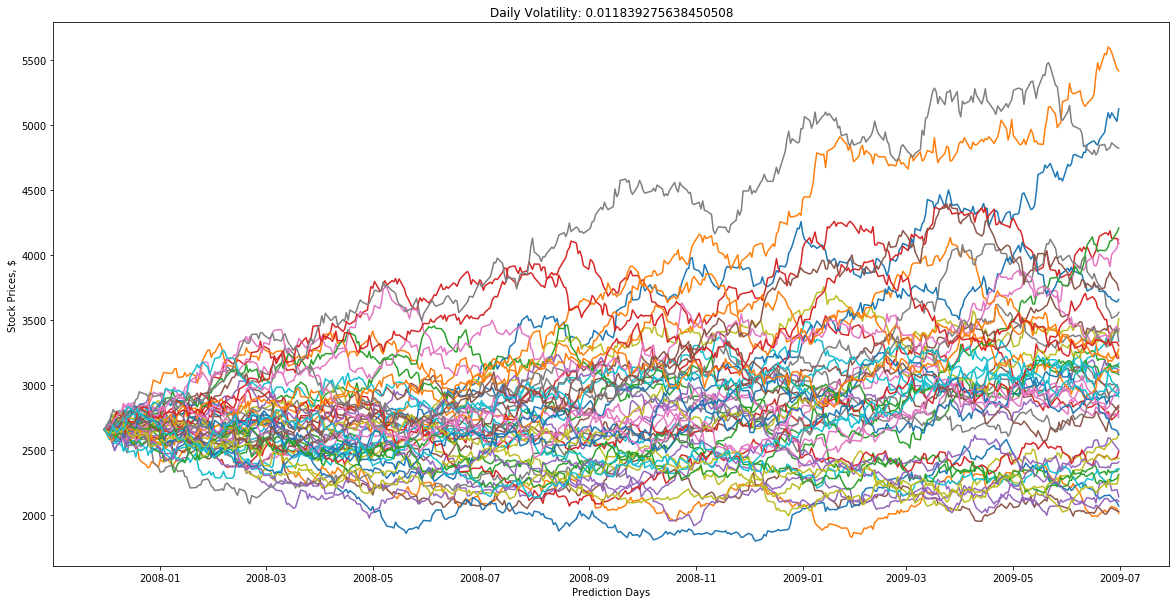

In [13]:
plt.figure(figsize = (20,10))

for i in range(scen_size):
    plt.title("Daily Volatility: " + str(sigma))
    plt.plot(pd.date_range(start = IXIC["Date"].max(), 
                end = pred_end_date, freq = 'D').map(lambda x:
                x if x.isoweekday() in range (1, 6) else np.nan).dropna(), S[i, :])
    plt.ylabel('Stock Prices, $')
    plt.xlabel('Prediction Days')
    
plt.show()